Problem 1

c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


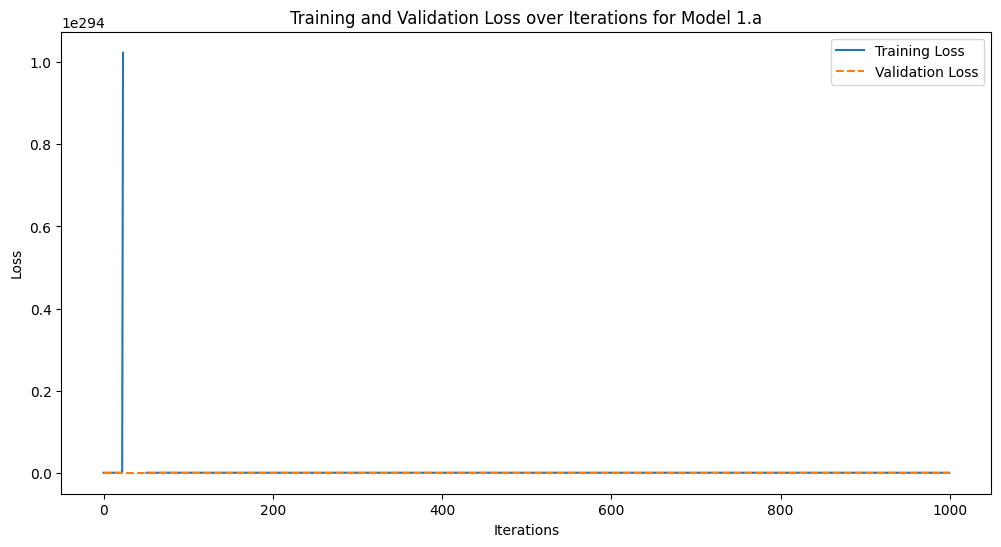

c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


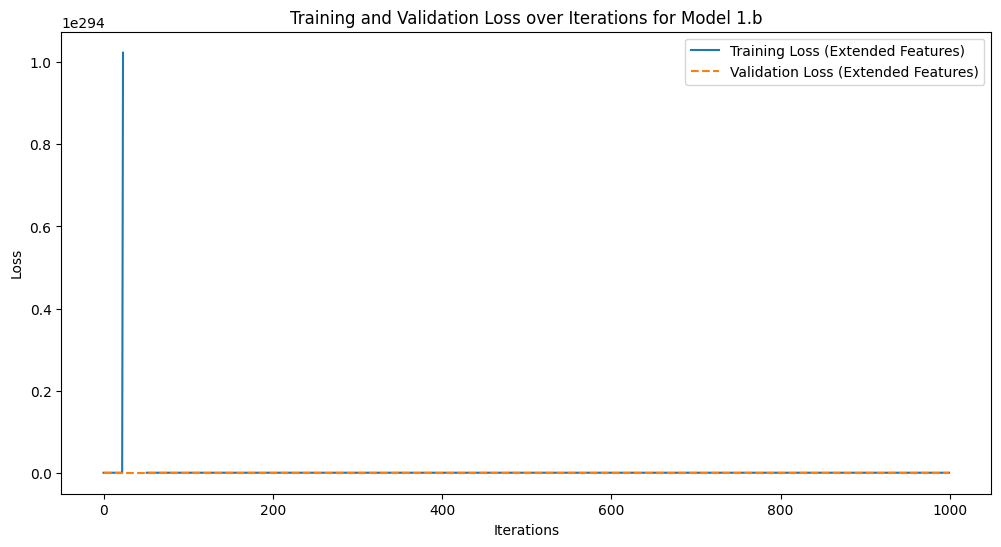

Validation Loss for Model 1.a: 0.0
Validation Loss for Model 1.b: 0.0


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical features to numeric
categorical_features = ['mainroad', 'guestroom', 'basement', 
                        'hotwaterheating', 'airconditioning', 'prefarea']

for feature in categorical_features:
    data[feature] = data[feature].map({'yes': 1, 'no': 0})

# Separate features and target for model 1.a
X_a = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

# 80% - 20% split training - validation
X_train_a, X_val_a, y_train, y_val = train_test_split(X_a, y, test_size=0.2, random_state=67)

# Function for gradient descent
def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    theta = np.zeros(X.shape[1])
    losses = []
    
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        loss = (1 / (2 * m)) * np.sum(errors ** 2)
        losses.append(loss)
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
    
    return theta, losses

# 1.a) Gradient descent with selected features
learning_rate_a = 0.04
iterations = 1000
theta_a, losses_a = gradient_descent(X_train_a, y_train, learning_rate_a, iterations)

# Calculate validation losses for each iteration
val_losses_a = []
for i in range(len(losses_a)):
    val_predictions_a = X_val_a.dot(theta_a)
    val_loss_a = (1 / (2 * len(y_val))) * np.sum((val_predictions_a - y_val) ** 2)
    val_losses_a.append(val_loss_a)

# Plotting the training and validation loss for model 1.a
plt.figure(figsize=(12, 6))
plt.plot(losses_a, label='Training Loss')
plt.plot(val_losses_a, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss over Iterations for Model 1.a')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 1.b) Extend features and repeat process
X_b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking'] + categorical_features]
X_train_b, X_val_b, y_train, y_val = train_test_split(X_b, y, test_size=0.2, random_state=67)

# Gradient descent with extended features
learning_rate_b = 0.04
iterations = 1000
theta_b, losses_b = gradient_descent(X_train_b, y_train, learning_rate_b, iterations)

# Calculate validation losses for each iteration for model 1.b
val_losses_b = []
for i in range(len(losses_b)):
    val_predictions_b = X_val_b.dot(theta_b)
    val_loss_b = (1 / (2 * len(y_val))) * np.sum((val_predictions_b - y_val) ** 2)
    val_losses_b.append(val_loss_b)

# Plotting the training and validation loss for model 1.b
plt.figure(figsize=(12, 6))
plt.plot(losses_b, label='Training Loss (Extended Features)')
plt.plot(val_losses_b, label='Validation Loss (Extended Features)', linestyle='--')
plt.title('Training and Validation Loss over Iterations for Model 1.b')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparison of final validation losses
print(f'Validation Loss for Model 1.a: {val_losses_a[-1]}')
print(f'Validation Loss for Model 1.b: {val_losses_b[-1]}')

Problem 2

c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


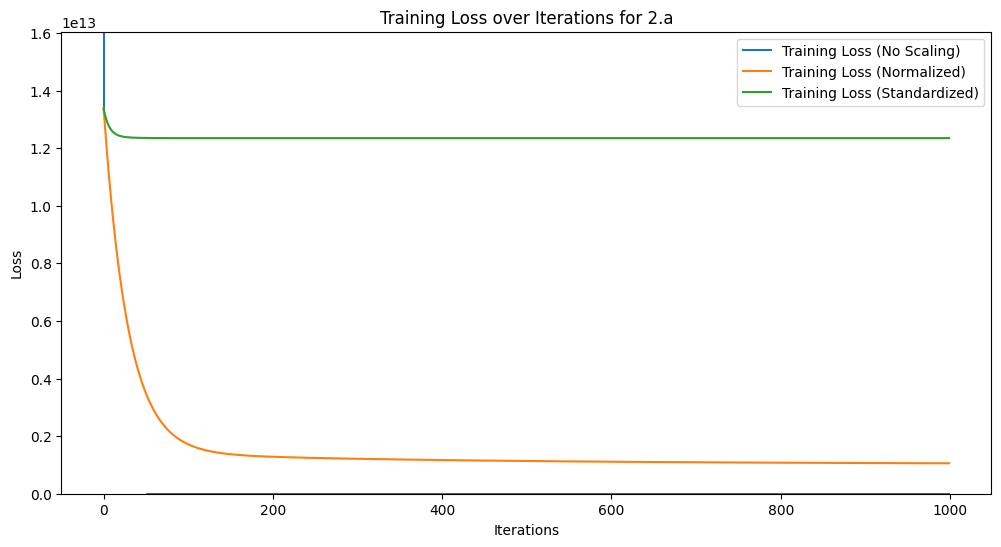

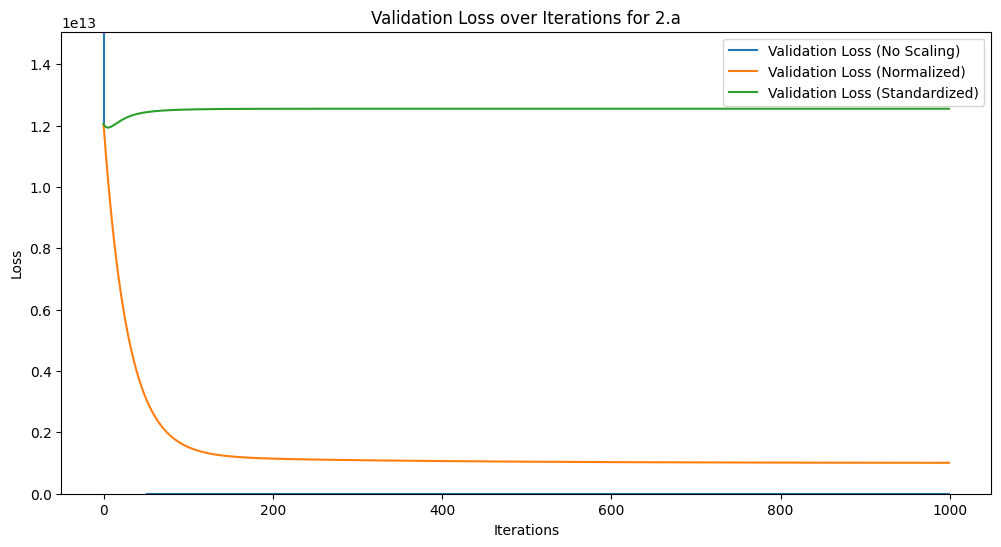

c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


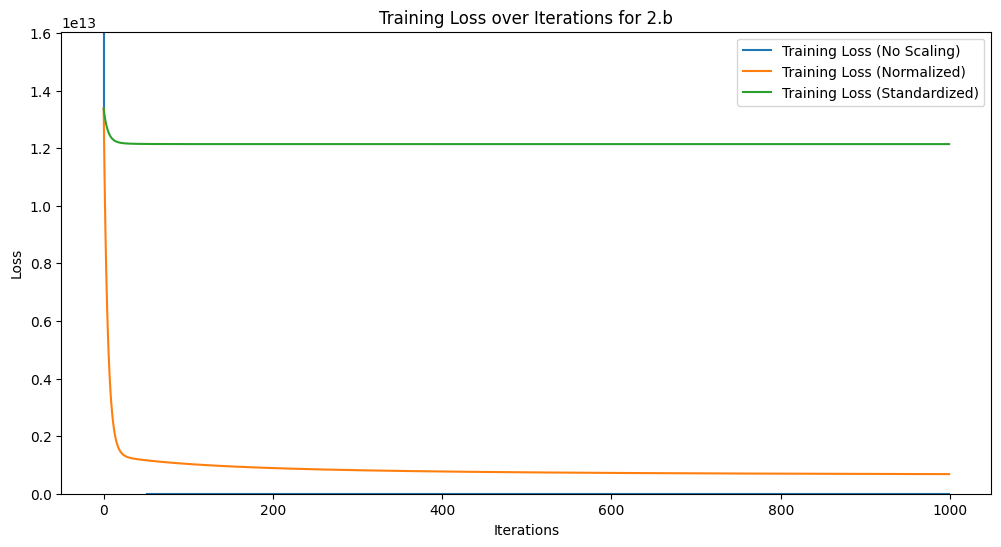

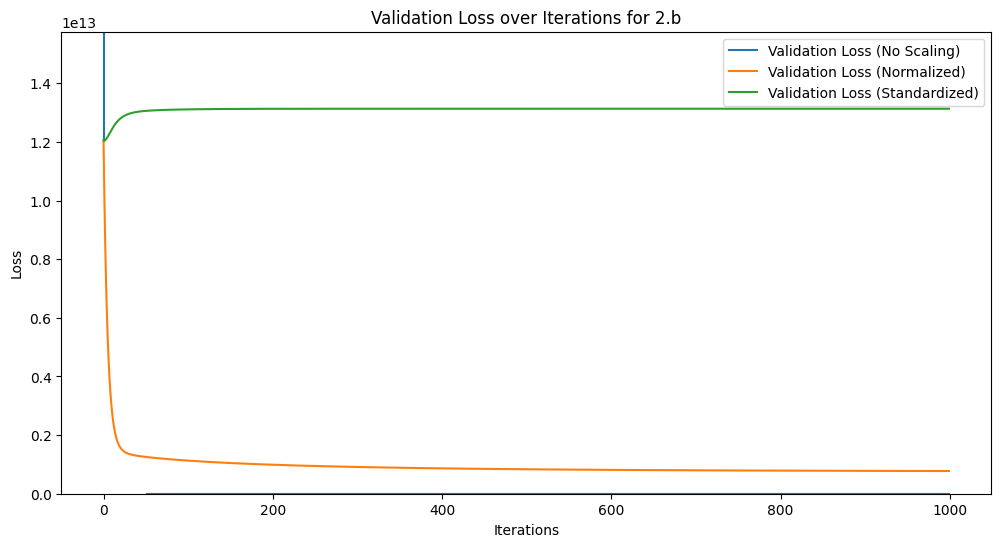

Validation Loss (No Scaling) for Model 1.a: 0.0
Validation Loss (Normalized) for Model 2.a: 1007802838611.4381
Validation Loss (Standardized) for Model 2.a: 12548872554946.611

Validation Loss (No Scaling) for Model 1.b: 0.0
Validation Loss (Normalized) for Model 2.b: 774277849520.2745
Validation Loss (Standardized) for Model 2.b: 13132966143434.178


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical features to numeric
categorical_features = ['mainroad', 'guestroom', 'basement', 
                        'hotwaterheating', 'airconditioning', 'prefarea']

for feature in categorical_features:
    data[feature] = data[feature].map({'yes': 1, 'no': 0})

# Function for gradient descent
def gradient_descent(X, y, learning_rate, iterations, X_val, y_val):
    m = len(y)
    theta = np.zeros(X.shape[1])
    losses = []
    val_losses = []
    
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        loss = (1 / (2 * m)) * np.sum(errors ** 2)
        losses.append(loss)
        
        # Calculate validation loss
        val_predictions = X_val.dot(theta)
        val_loss = (1 / (2 * len(y_val))) * np.sum((val_predictions - y_val) ** 2)
        val_losses.append(val_loss)
        
        gradient = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradient
    
    return theta, losses, val_losses

def train_and_evaluate(X_train, y_train, X_val, y_val, learning_rate, iterations):
    theta, losses, val_losses = gradient_descent(X_train, y_train, learning_rate, iterations, X_val, y_val)
    return losses, val_losses

def plot_losses(losses, losses_normalized, losses_standardized, title, label_suffix=''):
    max_loss = max(max(losses_normalized), max(losses_standardized))
    plt.figure(figsize=(12, 6))
    plt.plot(losses, label=f'{label_suffix} (No Scaling)')
    plt.plot(losses_normalized, label=f'{label_suffix} (Normalized)')
    plt.plot(losses_standardized, label=f'{label_suffix} (Standardized)')
    plt.title(f'{label_suffix} over Iterations for {title}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.ylim(0, 1.2*max_loss)
    plt.legend()
    plt.show()



# 2.a) Prepare data without scaling
X_a = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']
X_train_a, X_val_a, y_train, y_val = train_test_split(X_a, y, test_size=0.2, random_state=67)

# Training without normalization or standardization for Model 2.a
learning_rate_a = 0.04
iterations = 1000
theta_a, losses_a, val_losses_a = gradient_descent(X_train_a, y_train, learning_rate_a, iterations, X_val_a, y_val)

# Normalization for Model 2.a
normalizer = MinMaxScaler()
X_train_a_normalized = normalizer.fit_transform(X_train_a)
X_val_a_normalized = normalizer.transform(X_val_a)

# Standardization for Model 2.a
standardizer = StandardScaler()
X_train_a_standardized = standardizer.fit_transform(X_train_a)
X_val_a_standardized = standardizer.transform(X_val_a)

# Training with Normalized Data for Model 2.a
losses_a_normalized, val_losses_a_normalized = train_and_evaluate(X_train_a_normalized, y_train, X_val_a_normalized, y_val, learning_rate_a, iterations)

# Training with Standardized Data for Model 2.a
losses_a_standardized, val_losses_a_standardized = train_and_evaluate(X_train_a_standardized, y_train, X_val_a_standardized, y_val, learning_rate_a, iterations)

# Plotting the training and validation loss for model 2.a
plot_losses(losses_a, losses_a_normalized, losses_a_standardized, '2.a', 'Training Loss')
plot_losses(val_losses_a, val_losses_a_normalized, val_losses_a_standardized, '2.a', 'Validation Loss')




# 2.b) Extend features and repeat process
X_b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking'] + categorical_features]
X_train_b, X_val_b, y_train, y_val = train_test_split(X_b, y, test_size=0.2, random_state=67)

# Training without normalization or standardization for Model 2.b
theta_b, losses_b, val_losses_b = gradient_descent(X_train_b, y_train, learning_rate_a, iterations, X_val_b, y_val)

# Normalization for Model 2.b
X_train_b_normalized = normalizer.fit_transform(X_train_b)
X_val_b_normalized = normalizer.transform(X_val_b)

# Standardization for Model 2.b
X_train_b_standardized = standardizer.fit_transform(X_train_b)
X_val_b_standardized = standardizer.transform(X_val_b)

# Training with Normalized Data for Model 2.b
losses_b_normalized, val_losses_b_normalized = train_and_evaluate(X_train_b_normalized, y_train, X_val_b_normalized, y_val, learning_rate_a, iterations)

# Training with Standardized Data for Model 2.b
losses_b_standardized, val_losses_b_standardized = train_and_evaluate(X_train_b_standardized, y_train, X_val_b_standardized, y_val, learning_rate_a, iterations)

# Plotting the training and validation loss for model 2.b
plot_losses(losses_b, losses_b_normalized, losses_b_standardized, '2.b', 'Training Loss')
plot_losses(val_losses_b, val_losses_b_normalized, val_losses_b_standardized, '2.b', 'Validation Loss')




# Print validation losses for both models
print(f'Validation Loss (No Scaling) for Model 1.a: {val_losses_a[-1]}')
print(f'Validation Loss (Normalized) for Model 2.a: {val_losses_a_normalized[-1]}')
print(f'Validation Loss (Standardized) for Model 2.a: {val_losses_a_standardized[-1]}')
print()

print(f'Validation Loss (No Scaling) for Model 1.b: {val_losses_b[-1]}')
print(f'Validation Loss (Normalized) for Model 2.b: {val_losses_b_normalized[-1]}')
print(f'Validation Loss (Standardized) for Model 2.b: {val_losses_b_standardized[-1]}')


Problem 3

c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


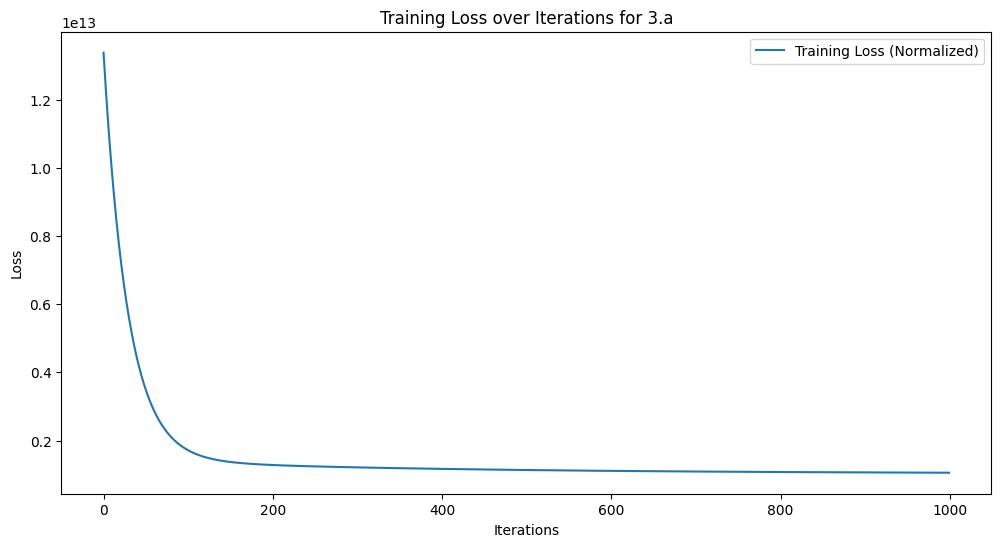

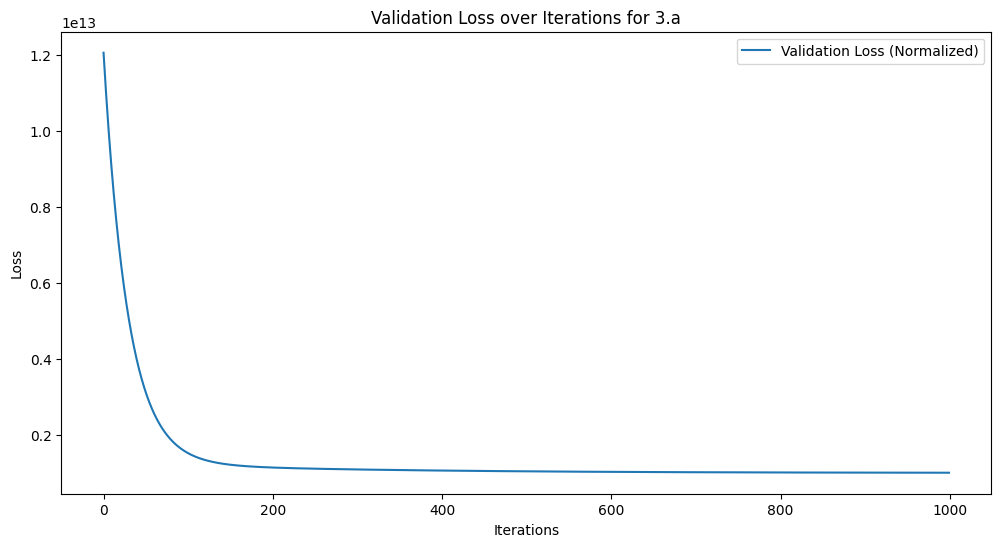

c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Python312\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


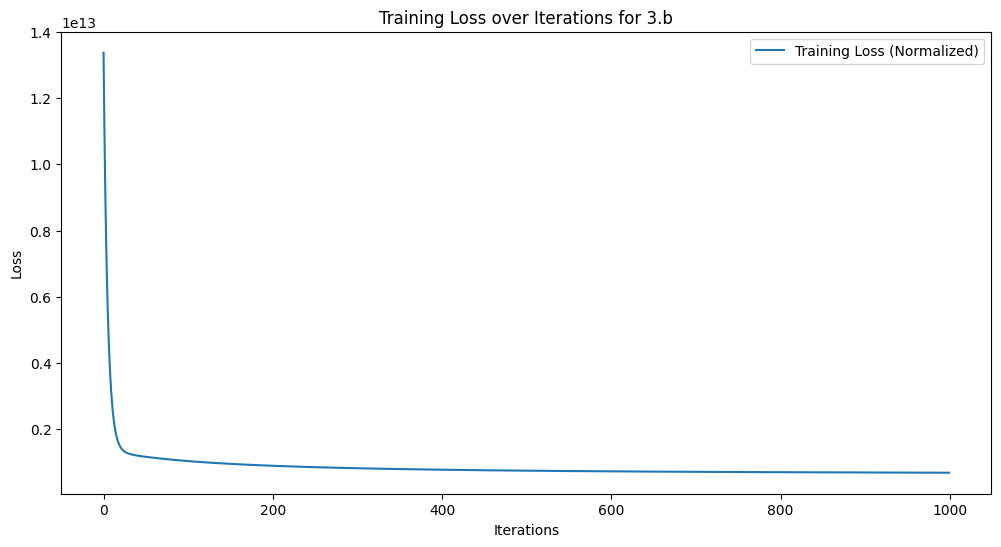

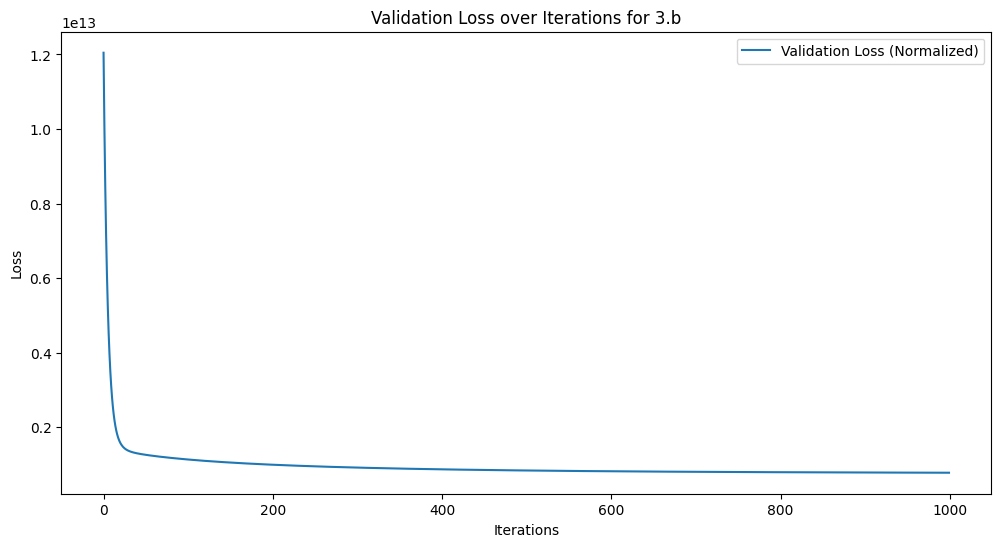

Validation Loss (No Scaling) for Model 3.a: 0.0
Validation Loss (Normalized) for Model 3.a: 1007814911082.8104
Validation Loss (Standardized) for Model 3.a: 12548845879730.693

Validation Loss (No Scaling) for Model 3.b: 0.0
Validation Loss (Normalized) for Model 3.b: 774331286500.2314
Validation Loss (Standardized) for Model 3.b: 13132939117279.77


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical features to numeric
categorical_features = ['mainroad', 'guestroom', 'basement', 
                        'hotwaterheating', 'airconditioning', 'prefarea']

for feature in categorical_features:
    data[feature] = data[feature].map({'yes': 1, 'no': 0})

# Function for gradient descent
def gradient_descent(X, y, learning_rate, iterations, X_val, y_val, lambda_reg=0.01):
    m = len(y)
    theta = np.zeros(X.shape[1])
    losses = []
    val_losses = []
    
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        loss = (1 / (2 * m)) * np.sum(errors ** 2) + (lambda_reg / (2 * m)) * np.sum(theta ** 2)
        losses.append(loss)
        
        # Calculate validation loss without regularization
        val_predictions = X_val.dot(theta)
        val_loss = (1 / (2 * len(y_val))) * np.sum((val_predictions - y_val) ** 2)
        val_losses.append(val_loss)
        
        gradient = (1 / m) * X.T.dot(errors) + (lambda_reg / m) * theta  # Regularization term in gradient
        theta -= learning_rate * gradient
    
    return theta, losses, val_losses


def train_and_evaluate(X_train, y_train, X_val, y_val, learning_rate, iterations):
    theta, losses, val_losses = gradient_descent(X_train, y_train, learning_rate, iterations, X_val, y_val)
    return losses, val_losses

def plot_losses(losses, losses_normalized, losses_standardized, title, label_suffix=''):
    # max_loss = max(max(losses_normalized), max(losses_standardized))
    plt.figure(figsize=(12, 6))
    # plt.plot(losses, label=f'{label_suffix} (No Scaling)')
    plt.plot(losses_normalized, label=f'{label_suffix} (Normalized)')
    # plt.plot(losses_standardized, label=f'{label_suffix} (Standardized)')
    plt.title(f'{label_suffix} over Iterations for {title}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    # plt.ylim(0, 1.2*max_loss)
    plt.legend()
    plt.show()



# 3.a) Prepare data without scaling
X_a = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']
X_train_a, X_val_a, y_train, y_val = train_test_split(X_a, y, test_size=0.2, random_state=67)

# Training without normalization or standardization for Model 3.a
learning_rate_a = 0.04
iterations = 1000
theta_a, losses_a, val_losses_a = gradient_descent(X_train_a, y_train, learning_rate_a, iterations, X_val_a, y_val)

# Normalization for Model 3.a
normalizer = MinMaxScaler()
X_train_a_normalized = normalizer.fit_transform(X_train_a)
X_val_a_normalized = normalizer.transform(X_val_a)

# Standardization for Model 3.a
standardizer = StandardScaler()
X_train_a_standardized = standardizer.fit_transform(X_train_a)
X_val_a_standardized = standardizer.transform(X_val_a)

# Training with Normalized Data for Model 3.a
losses_a_normalized, val_losses_a_normalized = train_and_evaluate(X_train_a_normalized, y_train, X_val_a_normalized, y_val, learning_rate_a, iterations)

# Training with Standardized Data for Model 3.a
losses_a_standardized, val_losses_a_standardized = train_and_evaluate(X_train_a_standardized, y_train, X_val_a_standardized, y_val, learning_rate_a, iterations)

# Plotting the training and validation loss for model 3.a
plot_losses(losses_a, losses_a_normalized, losses_a_standardized, '3.a', 'Training Loss')
plot_losses(val_losses_a, val_losses_a_normalized, val_losses_a_standardized, '3.a', 'Validation Loss')




# 3.b) Extend features and repeat process
X_b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'parking'] + categorical_features]
X_train_b, X_val_b, y_train, y_val = train_test_split(X_b, y, test_size=0.2, random_state=67)

# Training without normalization or standardization for Model 3.b
theta_b, losses_b, val_losses_b = gradient_descent(X_train_b, y_train, learning_rate_a, iterations, X_val_b, y_val)

# Normalization for Model 3.b
X_train_b_normalized = normalizer.fit_transform(X_train_b)
X_val_b_normalized = normalizer.transform(X_val_b)

# Standardization for Model 3.b
X_train_b_standardized = standardizer.fit_transform(X_train_b)
X_val_b_standardized = standardizer.transform(X_val_b)

# Training with Normalized Data for Model 3.b
losses_b_normalized, val_losses_b_normalized = train_and_evaluate(X_train_b_normalized, y_train, X_val_b_normalized, y_val, learning_rate_a, iterations)

# Training with Standardized Data for Model 3.b
losses_b_standardized, val_losses_b_standardized = train_and_evaluate(X_train_b_standardized, y_train, X_val_b_standardized, y_val, learning_rate_a, iterations)

# Plotting the training and validation loss for model 3.b
plot_losses(losses_b, losses_b_normalized, losses_b_standardized, '3.b', 'Training Loss')
plot_losses(val_losses_b, val_losses_b_normalized, val_losses_b_standardized, '3.b', 'Validation Loss')




# Print validation losses for both models
print(f'Validation Loss (No Scaling) for Model 3.a: {val_losses_a[-1]}')
print(f'Validation Loss (Normalized) for Model 3.a: {val_losses_a_normalized[-1]}')
print(f'Validation Loss (Standardized) for Model 3.a: {val_losses_a_standardized[-1]}')
print()

print(f'Validation Loss (No Scaling) for Model 3.b: {val_losses_b[-1]}')
print(f'Validation Loss (Normalized) for Model 3.b: {val_losses_b_normalized[-1]}')
print(f'Validation Loss (Standardized) for Model 3.b: {val_losses_b_standardized[-1]}')
